# Demo: Analysis

This example is the continuation of the previous example: [filling gaps](https://metobs-toolkit.readthedocs.io/en/latest/examples/filling_example.html). This example serves as an introduction to the Analysis module. In the MetObs-toolkit there is a ``Analysis`` class, that holds some common methods used in research. 

To start, we import the demo dataset.

In [1]:
import metobs_toolkit
dataset = metobs_toolkit.Dataset() #Create a new dataset object

#Load the data
dataset.import_data_from_file(
                    template_file=metobs_toolkit.demo_template, #The template file
                    input_data_file=metobs_toolkit.demo_datafile, #The data file
                    input_metadata_file=metobs_toolkit.demo_metadatafile, #The metadata file
                    )

Luchtdruk is present in the datafile, but not found in the template! This column will be ignored.


Neerslagintensiteit is present in the datafile, but not found in the template! This column will be ignored.


Neerslagsom is present in the datafile, but not found in the template! This column will be ignored.


Rukwind is present in the datafile, but not found in the template! This column will be ignored.


Luchtdruk_Zeeniveau is present in the datafile, but not found in the template! This column will be ignored.


Globe Temperatuur is present in the datafile, but not found in the template! This column will be ignored.


The following columns are present in the data file, but not in the template! They are skipped!
 ['Neerslagintensiteit', 'Neerslagsom', 'Rukwind', 'Globe Temperatuur', 'Luchtdruk', 'Luchtdruk_Zeeniveau']


The following columns are found in the metadata, but not in the template and are therefore ignored: 
['benaming', 'sponsor', 'stad', 'Network']


Later in this demo we will some landcover information, we extract this for all are stations in the dataset.

In [2]:
#Get LCZ, and landcover fractions will be used later on
_lczseries = dataset.get_LCZ()


## Creating an Analysis

The built-in analysis functionality is centered around the ``Analysis`` class. This class holds only records that are assumed to be correct. Thus there are no QC outliers or gaps present defined, the data hold by an `Analysis` is hold in a single dataframe.


We can create an `Analysis` instance from a ``Dataset`` (or from a ``Station``). 



In [3]:
analysis = metobs_toolkit.Analysis(Dataholder=dataset)
analysis.get_info()

Analysis Instance Information: 
Number of records: 120960
Observation types: ['humidity', 'temp', 'wind_direction', 'wind_speed']
Available metadata columns: ['lat', 'lon', 'LCZ', 'school', 'geometry']
Stations: ['vlinder01', 'vlinder02', 'vlinder03', 'vlinder04', 'vlinder05', 'vlinder06', 'vlinder07', 'vlinder08', 'vlinder09', 'vlinder10', 'vlinder11', 'vlinder12', 'vlinder13', 'vlinder14', 'vlinder15', 'vlinder16', 'vlinder17', 'vlinder18', 'vlinder19', 'vlinder20', 'vlinder21', 'vlinder22', 'vlinder23', 'vlinder24', 'vlinder25', 'vlinder26', 'vlinder27', 'vlinder28']
All known time-derivatives: ['year', 'month', 'hour', 'minute', 'second', 'day_of_year', 'season']


/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/metobs_toolkit/analysis.py:723: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  ).map(


In [4]:
analysis.df.index.get_level_values('datetime').tz


datetime.timezone.utc

We can inspect the stored data from the ``Analysis.df`` and ``Analysis.metadf`` attributes.

In [5]:
analysis.df.head(10)

humidity       temp  wind_direction  \
datetime                  name                                             
2022-09-01 00:00:00+00:00 vlinder01      65.0  18.799999            65.0   
                          vlinder02      62.0  19.400000            25.0   
                          vlinder03      65.0  17.000000           115.0   
                          vlinder04      66.0  15.900000            25.0   
                          vlinder05      61.0  21.100000            45.0   
                          vlinder06      65.0  17.700001            95.0   
                          vlinder07      63.0  18.100000            15.0   
                          vlinder08      59.0  19.200001           165.0   
                          vlinder09      63.0  18.000000            55.0   
                          vlinder10      63.0  19.100000             5.0   

                                     wind_speed  
datetime                  name                   
2022-09-01 00:00:00+00:00 vlinder01    1.555556  
                          vlinder02    0.194444  
                          vlinder03    0.333333  
                          vlinder04    0.083333  
                          vlinder05    1.611111  
                          vlinder06    0.138889  
                          vlinder07    0.611111  
                          vlinder08    0.222222  
                          vlinder09    0.888889  
                          vlinder10    0.472222

In [6]:
analysis.metadf.head(10)

,lat,lon,LCZ,school,geometry
name,,,,,
vlinder01,50.980438,3.815763,Low plants (LCZ D),UGent,POINT (3.81576 50.98044)
vlinder02,51.022379,3.709695,Large lowrise,UGent,POINT (3.7097 51.02238)
vlinder03,51.324583,4.952109,Open midrise,Heilig Graf,POINT (4.95211 51.32458)
vlinder04,51.335522,4.934732,Sparsely built,Heilig Graf,POINT (4.93473 51.33552)
vlinder05,51.052655,3.675183,Water (LCZ G),Sint-Barbara,POINT (3.67518 51.05266)
vlinder06,51.027100,4.516300,Scattered Trees (LCZ B),BimSem,POINT (4.5163 51.0271)
vlinder07,51.030889,4.478445,Compact midrise,PTS,POINT (4.47844 51.03089)
vlinder08,51.028130,4.477398,Compact midrise,TSM,POINT (4.4774 51.02813)
vlinder09,50.927167,4.075722,Scattered Trees (LCZ B),SMI,POINT (4.07572 50.92717)


## Analysis methods

An overview of the available analysis methods can be seen in the documentation of the ``Analysis`` class. The relevant methods depend on your data and your interests. As an example, a demonstration of the filter and diurnal cycle of the demo data.



### Filtering data

It is common to filter your data according to specific meteorological phenomena or periods in time. To do this you can use the ``apply_filter_on_records()`` method. 

*NOTE*: The filtering will remove data

In [7]:
print(f'The initial number of records: {analysis.df.shape[0]}')

#filter to non-windy afternoons
analysis.apply_filter_on_records('(wind_speed <= 2.5) & (hour > 12) & (hour < 20)')

#We can apply multiple consecutive filterings
analysis.apply_filter_on_records('season=="autumn" | season=="winter"') #Be aware of quotation! 


print(f'The number of records after filtering: {analysis.df.shape[0]}')


The initial number of records: 120960


The number of records after filtering: 28536


We can also use the metadata to filter to by using ``apply_filter_on_metadata()`` method.

In [8]:
analysis.apply_filter_on_metadata("LCZ == 'Large lowrise'")

## Diurnal cycle 

To make a diurnal cycle plot of your Analysis use the ``get_diurnal_statistics()`` method:

/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/metobs_toolkit/analysis.py:328: FutureWarning: The provided callable <function nanmean at 0x7f301420a4d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_df = fulldf.groupby(agg, observed=True).agg(method)


<Axes: title={'center': 'Diurnal cycle of humidity grouped per name.'}, xlabel='Diurnal Timestamps (in UTC)', ylabel='humidity (percent)'>

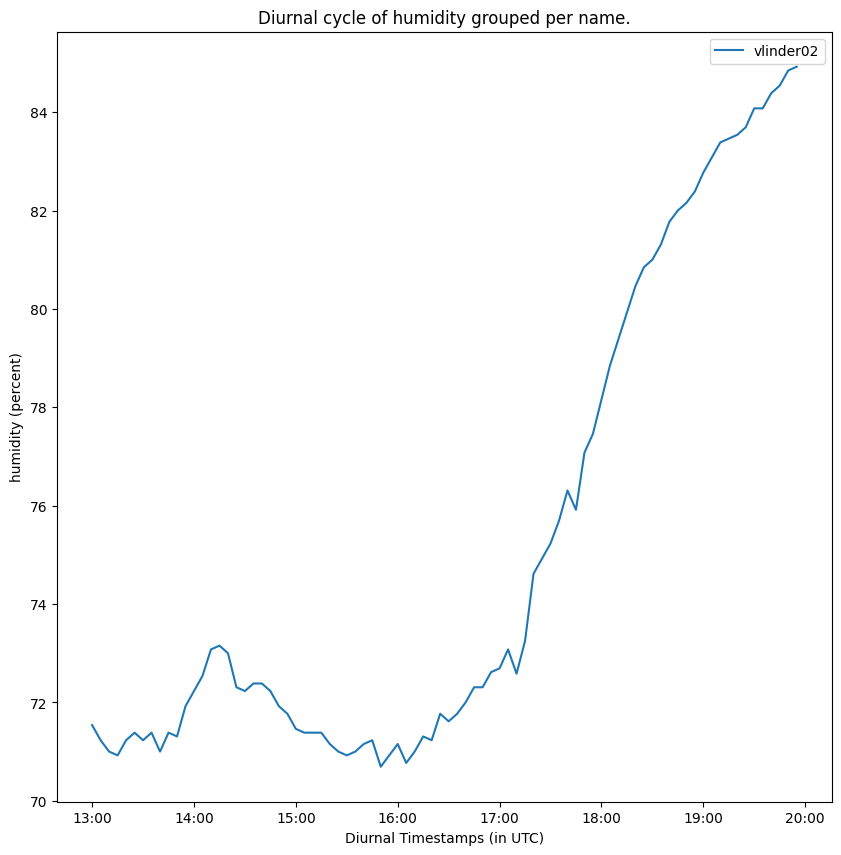

In [9]:
analysis.plot_diurnal_cycle(colorby='name', #each station is plotted, and colored differently
                                trgobstype='humidity', 
                                return_data = False,
                                )

*Note*: Be aware that we filtered the data to wind-still afternoons in autumn! 

If you want to work with the aggregated values, you can use the ``aggregate_df()`` method. As illustration we undo the filtering to have some more variability in the data. Then we aggregate the data per LCZ. 

In [ ]:
import numpy as np

#Start with an unfiltered analysis
analysis=metobs_toolkit.Analysis(Dataholder=dataset) 

aggdf = analysis.aggregate_df(trgobstype='temp',
                      agg=["LCZ", "hour"], #by adding hour, we keep the diurnal variation
                      method=np.mean) #the aggregation function to use.
aggdf

/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/metobs_toolkit/analysis.py:723: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  ).map(
/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/metobs_toolkit/analysis.py:328: FutureWarning: The provided callable <function mean at 0x7f302c076950> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_df = fulldf.groupby(agg, observed=True).agg(method)


temp
LCZ             hour           
Compact midrise 0     17.739286
                1     17.230398
                2     16.657461
                3     16.421507
                4     16.209682
...                         ...
Water (LCZ G)   19    19.380926
                20    18.933889
                21    18.553888
                22    18.320370
                23    18.126852

[240 rows x 1 columns]

### Diurnal cycle of differences

The diurnal cycle of differences is also implemented. The values are the aggregated diurnal differences wrt a reference station.

As an example the diurnal temperature difference cycle is plotted with station *vlinder02* as the reference. The aggregation is done per LCZ.

/home/thoverga/anaconda3/envs/metobs_dev/lib/python3.10/site-packages/metobs_toolkit/analysis.py:535: FutureWarning: The provided callable <function nanmean at 0x7f301420a4d0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ).agg(np.nanmean)


<Axes: title={'center': 'Diurnal cycle of temp differences with vlinder02 as reference, grouped per LCZ.'}, xlabel='Diurnal Timestamps (in UTC)', ylabel='temp (degree_Celsius) difference'>

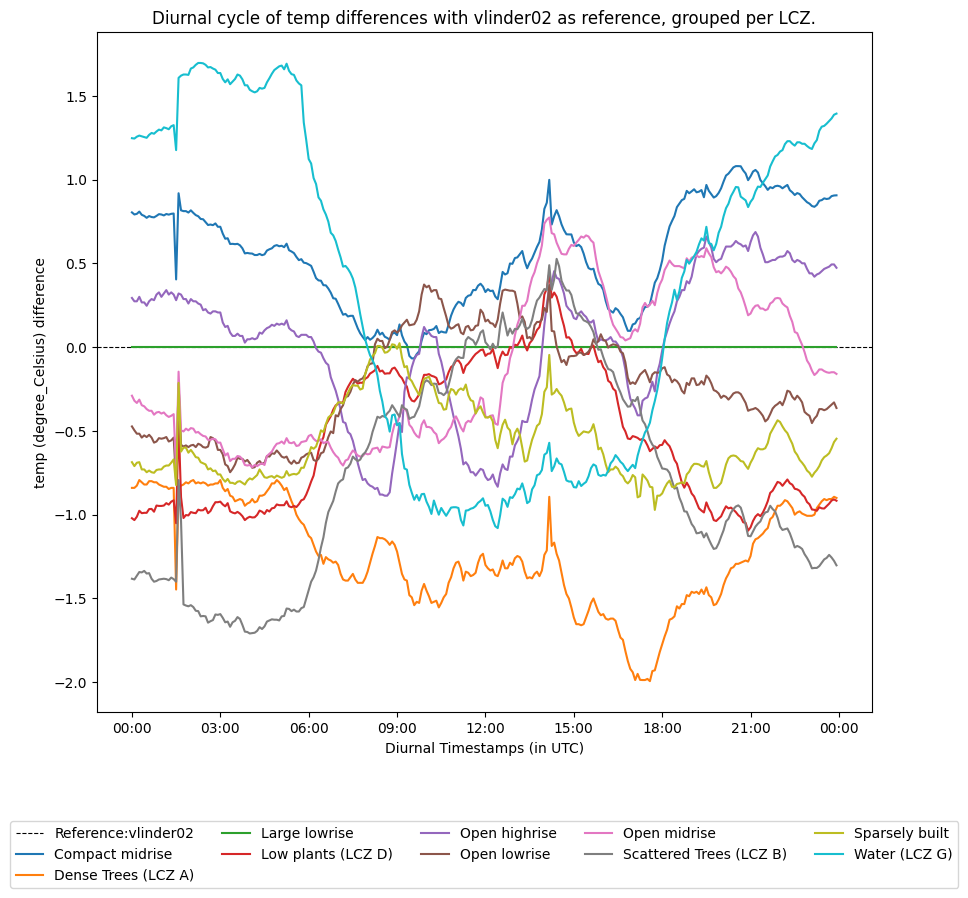

In [11]:
analysis.plot_diurnal_cycle_with_reference_station(ref_station='vlinder02',
                                                  trgobstype='temp',
                                                  colorby='LCZ')
